In [322]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from scipy.stats import gaussian_kde


In [323]:
######load data

file_name='results/'
shortprefixe=file_name

######loading mcmc samples
selected_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmc_samp.gnu"),columns=['t1','edm','exp','lcor','p'])
ss0=pd.DataFrame(data=np.loadtxt(shortprefixe+"samp0.gnu"),columns=['t1','p'])
ss1=pd.DataFrame(data=np.loadtxt(shortprefixe+"samp1.gnu"),columns=['t1','p'])
ss2=pd.DataFrame(data=np.loadtxt(shortprefixe+"samp2.gnu"),columns=['t1','p'])
#ss3=pd.DataFrame(data=np.loadtxt(shortprefixe+"samp3.gnu"),columns=['t1','p'])
#ss4=pd.DataFrame(data=np.loadtxt(shortprefixe+"samp4.gnu"),columns=['t1','p'])
ssgibbs=pd.DataFrame(data=np.loadtxt(shortprefixe+"selgibbs.gnu"),columns=['t1'])

ssgibbs2=pd.DataFrame(data=np.loadtxt(shortprefixe+"selgibbs2.gnu"),columns=['t1'])

so0=pd.DataFrame(data=np.loadtxt(shortprefixe+"sampopt0.gnu"),columns=['t1','p'])
so1=pd.DataFrame(data=np.loadtxt(shortprefixe+"sampopt1.gnu"),columns=['t1','p'])
so2=pd.DataFrame(data=np.loadtxt(shortprefixe+"sampopt2.gnu"),columns=['t1','p'])
sogibbs=pd.DataFrame(data=np.loadtxt(shortprefixe+"selgibbsopt.gnu"),columns=['t1'])

list_data=np.array([ss0,ss1,ss2])
list_dataopt=np.array([so0,so1,so2])



4


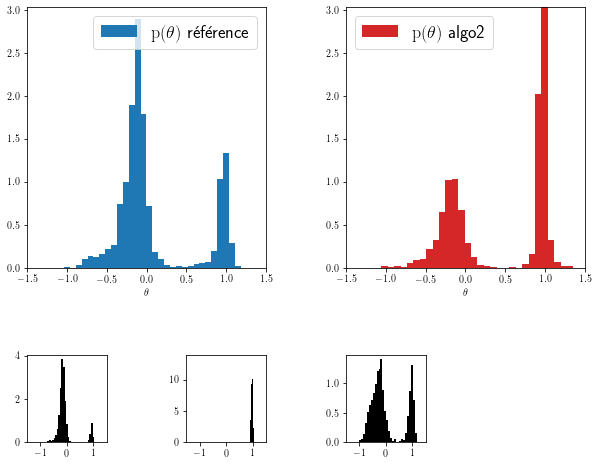

In [324]:
nbins=30
xmin=-1.5
xmax=1.5
ymin=0
ymax=15

n=list_data.shape[0]
if n%2!=0:
    n+=1

ns2=int(n/2)
print(n)
plt.figure(figsize=[10,8])
grid=plt.GridSpec(nrows= ns2+1,ncols=n,wspace=1, hspace=1)
plt.subplot(grid[:ns2,:ns2])
plt.hist(selected_samples['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$ référence',color='tab:blue',zorder=0)
plt.legend()
plt.xlim(xmin,xmax)
plt.xlabel(r'$\theta$')
l=plt.ylim()

plt.subplot(grid[:ns2,ns2:])
plt.hist(ssgibbs['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$ algo2',color='tab:red',zorder=0)
plt.legend()
plt.xlim(xmin,xmax)

plt.ylim(l)
plt.xlabel(r'$\theta$')

for i in range(list_data.shape[0]):
    plt.subplot(grid[ns2,i])
    plt.hist(list_data[i][:,0],bins=nbins,color='black',density=True)
    plt.xlim(xmin,xmax)


4


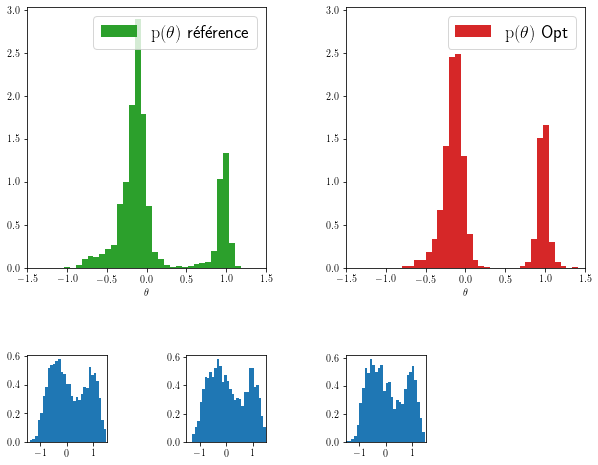

In [325]:
n=list_dataopt.shape[0]
if n%2!=0:
    n+=1

ns2=int(n/2)
print(n)
plt.figure(figsize=[10,8])
grid=plt.GridSpec(nrows= ns2+1,ncols=n,wspace=1, hspace=1)
plt.subplot(grid[:ns2,:ns2])
plt.hist(selected_samples['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$ référence',color='tab:green',zorder=0)
plt.legend()
plt.xlim(xmin,xmax)
plt.xlabel(r'$\theta$')
l=plt.ylim()

plt.subplot(grid[:ns2,ns2:])
plt.hist(sogibbs['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$ Opt',color='tab:red',zorder=0)
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(l)
plt.xlabel(r'$\theta$')

for i in range(list_dataopt.shape[0]):
    plt.subplot(grid[ns2,i])
    plt.hist(list_dataopt[i][:,0],bins=nbins,density=True)
    plt.xlim(xmin,xmax)


Text(0.5, 0, '$\\theta$')

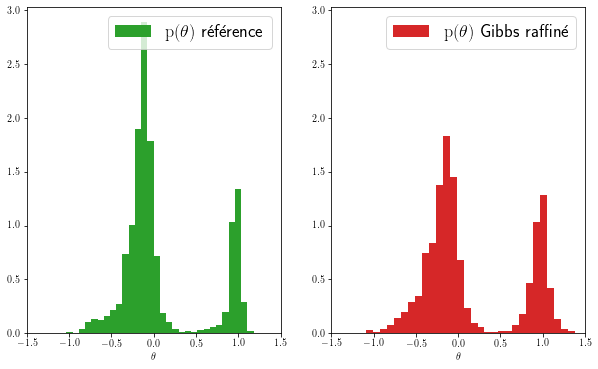

In [326]:
plt.figure(figsize=[10,6])
plt.subplot(121)
plt.hist(selected_samples['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$ référence',color='tab:green',zorder=0)
plt.legend()
plt.xlim(xmin,xmax)
plt.xlabel(r'$\theta$')
l=plt.ylim()

plt.subplot(122)
plt.hist(ssgibbs2['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$ Gibbs raffiné',color='tab:red',zorder=0)
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(l)
plt.xlabel(r'$\theta$')

(-1.5, 1.5)

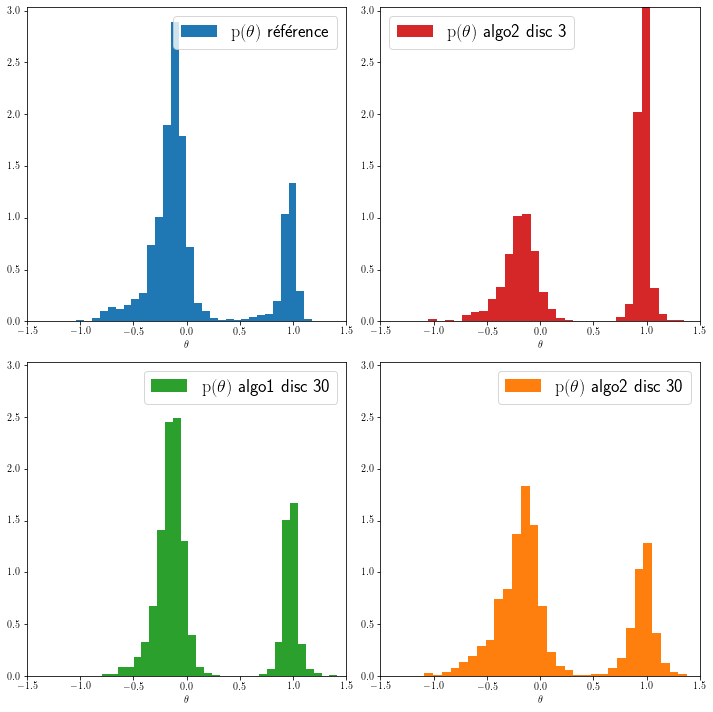

In [327]:
nbins=30

ymin=0
ymax=15
plt.figure(figsize=[10,10])
ax=plt.subplot(221)
ax.hist(selected_samples['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$ référence',zorder=0)
ax.set_xlabel(r'$\theta$')
l=plt.ylim()

ax2=plt.subplot(222)
ax2.hist(ssgibbs['t1'],bins=nbins,density=True,color='tab:red',label=r'$\mathrm{p}(\theta)$ algo2 disc 3',zorder=0)
ax2.set_xlabel(r'$\theta$')
plt.ylim(l)

ax3=plt.subplot(223)
ax3.hist(sogibbs['t1'],bins=nbins,density=True,color='tab:green',label=r'$\mathrm{p}(\theta)$ algo1 disc 30',zorder=0)
ax3.set_xlabel(r'$\theta$')
plt.ylim(l)

ax4=plt.subplot(224)
ax4.hist(ssgibbs2['t1'],bins=nbins,density=True,color='tab:orange',label=r'$\mathrm{p}(\theta)$ algo2 disc 30',zorder=0)
ax4.set_xlabel(r'$\theta$')
plt.ylim(l)

ax.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.tight_layout()
ax.set_xlim(xmin,xmax)
ax2.set_xlim(xmin,xmax)
ax3.set_xlim(xmin,xmax)
ax4.set_xlim(xmin,xmax)

In [328]:
#calcul des répartitions de masses :
print((selected_samples[selected_samples['t1']<0.5]['t1'].size)/(selected_samples['t1'].size))
print((ssgibbs[ssgibbs['t1']<0.5]['t1'].size)/(ssgibbs['t1'].size))
print((sogibbs[sogibbs['t1']<0.5]['t1'].size)/(sogibbs['t1'].size))
print((ssgibbs2[ssgibbs2['t1']<0.5]['t1'].size)/(ssgibbs2['t1'].size))

0.7722722722722722
0.3788788788788789
0.7052052052052052
0.6976976976976977


In [329]:
plot_meanpredsFZ()

NameError: name 'plot_meanpredsFZ' is not defined

In [ ]:
#affichage des densités sur un même graphe propre.

xmin=0
xmax=25
ymin=0
ymax=1.5E6




plt.figure(figsize=[14,6])
ax=plt.subplot(121)

plt.plot('xorig','yprediction',data=predopt1)
plt.plot('xorig','yprediction',data=predopt2)
plt.plot('xorig','yprediction',data=predopt3)
plt.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Prédictions méthode Opti')
plt.legend()
plt.grid()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

ax=plt.subplot(122)
plt.plot('xorig','yprediction',data=predkoh1)
plt.plot('xorig','yprediction',data=predkoh2)
plt.plot('xorig','yprediction',data=predkoh3)
plt.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Prédictions méthode KOH')
plt.legend()
plt.grid()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
#mcmc_allplot('b')

In [ ]:
#plt.style.use('mystyle')
mpl.rcParams['text.usetex']=True
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.weight']='bold'
#mpl.rcParams['axes.labelsize']= 33.0 #def value : 11.0
#mpl.rcParams['axes.titlesize']= 28.0 #def value : 12.0
mpl.rcParams['savefig.format']='png'
mpl.rcParams['font.size']=22

mpl.rcParams['legend.fontsize']=18

nbins=15
#priors
t1pmean=40.
t1pstd=2*5
t2pmean=18.9E-6
t2pstd=2E-6
t3pmean=0.6
t3pstd=2*0.05


margopt1['p']/=margopt1['p'].sum()*(margopt1['t1'][1]-margopt1['t1'][0])
margkoh1['p']/=margkoh1['p'].sum()*(margkoh1['t1'][1]-margkoh1['t1'][0])
margsimp1['p']/=margsimp1['p'].sum()*(margsimp1['t1'][1]-margsimp1['t1'][0])
margopt2['p']/=margopt2['p'].sum()*(margopt2['t2'][1]-margopt2['t2'][0])
margkoh2['p']/=margkoh2['p'].sum()*(margkoh2['t2'][1]-margkoh2['t2'][0])
margsimp2['p']/=margsimp2['p'].sum()*(margsimp2['t2'][1]-margsimp2['t2'][0])
margopt3['p']/=margopt3['p'].sum()*(margopt3['t3'][1]-margopt3['t3'][0])
margkoh3['p']/=margkoh3['p'].sum()*(margkoh3['t3'][1]-margkoh3['t3'][0])
margsimp3['p']/=margsimp3['p'].sum()*(margsimp3['t3'][1]-margsimp3['t3'][0])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.hist(selected_samples['t1'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax1.plot(margopt1['t1'],norm.pdf(margopt1['t1'],loc=t1pmean,scale=t1pstd),label='Prior')
ax1.plot(margopt1['t1'],margopt1['p'],label='FMP',color='black',marker=None,linewidth=3)
ax1.plot(margkoh1['t1'],margkoh1['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax1.plot(margsimp1['t1'],margsimp1['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)

#plt.title('Parameter posterior density')
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\mathrm{p}(\theta_1|y_{obs})$')
ax1.set_xlim(10,80)
ax1.set_ylim(0,2.5*margopt1['p'].max())
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax1.grid()
ax1.legend()

ax2.plot(margopt2['t2'],norm.pdf(margopt2['t2'],loc=t2pmean,scale=t2pstd),label='Prior',color='tab:orange')
ax2.hist(selected_samples['t2'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax2.plot(margopt2['t2'],margopt2['p'],label='FMP',color='black',marker=None,linewidth=3)
ax2.plot(margkoh2['t2'],margkoh2['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax2.plot(margsimp2['t2'],margsimp2['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)

#plt.title('Parameter posterior density')
ax2.set_xlabel(r'$\theta_2$')
ax2.set_ylabel(r'$\mathrm{p}(\theta_2|y_{obs})$')
ax2.set_xlim(1e-5,1.45*18.9E-6)
ax2.set_ylim(0,2.5*margopt2['p'].max())
ax2.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
ax2.grid()
#ax2.legend()

ax3.hist(selected_samples['t3'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax3.plot(margopt3['t3'],margopt3['p'],label='FMP',color='black',marker=None,linewidth=3)
ax3.plot(margkoh3['t3'],margkoh3['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax3.plot(margsimp3['t3'],margsimp3['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)
ax3.plot(margopt3['t3'],norm.pdf(margopt3['t3'],loc=t3pmean,scale=t3pstd),label='Prior')
#plt.title('Parameter posterior density')
ax3.set_xlabel(r'$\theta_3$')
ax3.set_ylabel(r'$\mathrm{p}(\theta_3|y_{obs})$')
ax3.set_ylim(0,2.5*margopt3['p'].max())
ax3.set_xlim(0.32,0.85)
ax3.grid()
#ax3.legend()

plt.tight_layout()


In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(6,6))

ax1.hist(selected_samples['t1'],bins=nbins,density=True,label='Bayes')#,zorder=0)
ax1.plot(margopt1['t1'],norm.pdf(margopt1['t1'],loc=t1pmean,scale=t1pstd),label='Prior')
ax1.plot(margopt1['t1'],margopt1['p'],label='FMP',color='black',marker=None,linewidth=3)
ax1.plot(margkoh1['t1'],margkoh1['p'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
ax1.plot(margsimp1['t1'],margsimp1['p'],':',label='Without model error',color='tab:green',marker=None,linewidth=3)

#plt.title('Parameter posterior density')
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel(r'$\mathrm{p}(\alpha|y_{obs})$')
ax1.set_xlim(10,80)
ax1.set_ylim(0,2.5*margopt1['p'].max())
ax1.ticklabel_format(axis='y',style='sci',scilimits=(0,0))

ax1.legend()
plt.show()

In [ ]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(6,6),gridspec_kw={'height_ratios': [5, 1]})

ax1.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax1.plot(predkoh['x'],predkoh['ymean'],color='black',label='prédiction moyenne')
ax1.plot(predkoh['x'],predkoh['ymean']+predkoh['stdf']+predkoh['stdedm'],'--',color='black',alpha=0.7)
ax1.plot(predkoh['x'],predkoh['ymean']-predkoh['stdf']-predkoh['stdedm'],'--',color='black',alpha=0.7)
ax1.set_xlim(0,24)
ax1.set_ylim(0,3000000)

ax2.fill_between(predkoh['x'],0,predkoh['stdf']/(predkoh['stdf']+predkoh['stdedm']),alpha=0.3,color='green')
ax2.fill_between(predkoh['x'],predkoh['stdf']/(predkoh['stdf']+predkoh['stdedm']),1,alpha=0.3,color='blue')
ax2.set_ylim(0,1)   
ax1.grid()
ax1.set_ylabel(r'Wall heat flux $[W.m^{-2}]$')
ax1.set_xlabel(r'Wall superheat $[K]$')
ax2.set_xlim(0,24)
plt.tight_layout()
    

In [ ]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(6,6),gridspec_kw={'height_ratios': [5, 1]})

ax1.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax1.plot(predopt['x'],predopt['ymean'],color='black',label='prédiction moyenne')
ax1.plot(predopt['x'],predopt['ymean']+predopt['stdf']+predopt['stdedm'],'--',color='black',alpha=0.7)
ax1.plot(predopt['x'],predopt['ymean']-predopt['stdf']-predopt['stdedm'],'--',color='black',alpha=0.7)
ax1.set_xlim(0,24)
ax1.set_ylim(0,3000000)
ax2.fill_between(predopt['x'],0,predopt['stdf']/(predopt['stdf']+predopt['stdedm']),alpha=0.3,color='green')
ax2.fill_between(predopt['x'],predopt['stdf']/(predopt['stdf']+predopt['stdedm']),1,alpha=0.3,color='blue')
ax2.set_ylim(0,1)   
ax1.grid()
ax1.set_ylabel(r'Wall heat flux $[W.m^{-2}]$')
ax1.set_xlabel(r'Wall superheat $[K]$')
ax2.set_xlim(0,24)
    
plt.tight_layout()

In [ ]:
fig, ((ax1),(ax2)) = plt.subplots(2,1, figsize=(6,6),gridspec_kw={'height_ratios': [5, 1]})

ax1.scatter(obso[:,0],obso[:,1],color='tab:red',label='observations')
ax1.plot(predmcmc['x'],predmcmc['ymean'],color='black',label='prédiction moyenne')
ax1.plot(predmcmc['x'],predmcmc['ymean']+predmcmc['stdf']+predmcmc['stdedm'],'--',color='black',alpha=0.7)
ax1.plot(predmcmc['x'],predmcmc['ymean']-predmcmc['stdf']-predmcmc['stdedm'],'--',color='black',alpha=0.7)
ax1.set_xlim(0,24)
ax1.set_ylim(0,3000000)
ax2.fill_between(predmcmc['x'],0,predmcmc['stdf']/(predmcmc['stdf']+predmcmc['stdedm']),alpha=0.3,color='green')
ax2.fill_between(predmcmc['x'],predmcmc['stdf']/(predmcmc['stdf']+predmcmc['stdedm']),1,alpha=0.3,color='blue')
ax2.set_ylim(0,1)   
ax1.grid()
ax1.set_ylabel(r'Wall heat flux $[W.m^{-2}]$')
ax1.set_xlabel(r'Wall superheat $[K]$')
ax2.set_xlim(0,24)
    
plt.tight_layout()

In [ ]:
###Exemple Plumlee gravity ball
def model(t,v,g):
    return 8+v*t-0.5*g*t**2

def truth(t):
    return 8+2.5*np.log(50./49.-(50./49.)*np.tanh(np.arctanh(np.sqrt(0.02))+np.sqrt(2)*t)**2)

lw=3.5
X=np.linspace(0,1,100)
fig=plt.figure(figsize=(6,6))
plt.plot(X,truth(X),label=r"truth",linewidth=lw,color='tab:blue')
plt.plot(X,model(X,-1,10),label=r"model,$(v_0,g)=(-1,10)$",linewidth=lw,color='tab:green')
plt.plot(X,model(X,-1.5,6),'--',label="model,$(v_0,g)=(-1.5,6)$",linewidth=lw,color='tab:orange')
plt.legend(loc='lower left')
plt.xlabel('Time')
plt.ylabel('Vertical position')
plt.show()


In [ ]:
def model(x,theta,c):
    return np.exp(-theta*x)+c

def truth(x):
    return np.exp(-5*x)+3

X=np.linspace(0,1,100)
fig=plt.figure(figsize=(6,6))
plt.plot(X,truth(X),label=r"truth",linewidth=lw,color='tab:blue')
plt.plot(X,model(X,5,3),label=r"model 1",linewidth=lw,color='tab:green')
plt.plot(X,model(X,-1.5,6),'--',label="model 2",linewidth=lw,color='tab:orange')
plt.legend(loc='lower left')
plt.xlabel('Time')
plt.ylabel('Vertical position')
plt.show()

In [ ]:
######loading mcmc samples
all_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmc_allsamples.gnu"),columns=['t1','t2','t3','edm','exp','lcor','p'])
selected_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmc_selectedsamples.gnu"),columns=['t1','t2','t3','edm','exp','lcor','p'])

In [ ]:
#histogramme des hyperparamètres (test)
plt.figure(figsize=(6,6))
plt.hist(selected_samples['lcor'],bins=nbins,label='t1')
plt.show()
#,zorder=0)

In [ ]:
#histogramme 2D des hyperparamètres (test)
from matplotlib.image import NonUniformImage
hparsestkoh=(227831,62736,10)
#hparsestkoh=(10000,109794,25)
nhead=40

xvector=selected_samples['edm']
yvector=selected_samples['exp']
H,xedges,yedges=np.histogram2d(xvector,yvector,bins=11,range=[[10000,300000],[10000,150000]])
H=H.T
X, Y = np.meshgrid(xedges, yedges)

###### hpars opti
hopt=pd.DataFrame(data=np.loadtxt(shortprefixe+"hopt.gnu"),columns=['t1','t2','t3','edm','exp','lcor'])
popt=pd.DataFrame(data=np.loadtxt(shortprefixe+"popt.gnu"),columns=['t1','t2','t3','p'])

popt=popt.sort_values(by=['p'],ascending=False)
#print(popt)
#print(hopt['lcor'].loc[popt.head(nhead).index])
#print(popt['p'].head(nhead))
hpars_points=hopt.loc[popt.head(nhead).index]


fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.pcolormesh(X, Y, H,cmap='Blues',alpha=0.6,shading='flat')
ax.scatter(hpars_points['edm'],hpars_points['exp'],edgecolor='black',marker='D',alpha=0.9,color='tab:orange',s=0.0009*popt['p'].head(nhead),label='FMP')
ax.scatter(hpars_points['edm'].head(1),hpars_points['exp'].head(1),edgecolor='black',marker='D',alpha=0.9,color='tab:orange',s=0.0009*popt['p'].head(1))

ax.scatter(hparsestkoh[0],hparsestkoh[1],edgecolor='black',marker='v',color='tab:green',s=250,label=r'MAP')
plt.legend()
ax.set_xlabel(r'$\sigma_{md}$')
ax.set_ylabel(r'$\sigma_{obs}$')

plt.show()
#,zorder=0)
print(hpars_points.head(40))
print(all_samples.sort_values(by=['p'],ascending=False).head(1))
#print(selected_samples)

In [ ]:
#estimation of model error
predoptFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predoptFZ.gnu"),columns=['x','ymean','stdf','zmean'])
predkohFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predkohFZ.gnu"),columns=['x','ymean','stdf','zmean'])
predmcmcFZ=pd.DataFrame(data=np.loadtxt(shortprefixe+"predmcmcFZ.gnu"),columns=['x','ymean','stdf','zmean'])
print(predkohFZ['zmean'].mean()*25)
print(predoptFZ['zmean'].mean()*25)
print(predmcmcFZ['zmean'].mean()*25)

In [ ]:
autocor=pd.DataFrame(data=np.loadtxt(shortprefixe+"autocor.gnu"),columns=['t1','t2','t3','edm','exp','lcor'])
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(autocor['lcor'])
ax.hlines(0,0,1000,color='tab:red')
plt.show()

In [ ]:
# le meilleur des samples ?
print(selected_samples.sort_values(by=['p'],ascending=False).head(20))

In [ ]:
print(all_samples.query('edm<206912').query('edm>204000').query('exp<62000').query('exp>61000').sort_values(by=['p'],ascending=False).head(20))

In [ ]:
plt.figure(figsize=(8,6))
plt.hist2d(selected_samples['edm'],selected_samples['exp'],cmap='viridis',alpha=0.6,bins=15,range=[[10000,300000],[10000,150000]])
plt.colorbar()
plt.show()
#H,xedges,yedges=np.histogram2d(xvector,yvector,bins=10,range=[[10000,300000],[10000,150000]])

In [ ]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([selected_samples['edm'],selected_samples['exp']])
kde = gaussian_kde(data,bw_method='scott')
kde.set_bandwidth(bw_method=0.263)

# evaluate on a regular grid
xgrid = np.linspace(10000,300000, 40)
ygrid = np.linspace(10000, 150000, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
plt.figure(figsize=(8,6))
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower',aspect='auto',extent=[10000,300000,10000,150000],
           cmap='Blues',alpha=0.9)
cb = plt.colorbar()
cb.set_label("density")
plt.scatter(hpars_points['edm'],hpars_points['exp'],edgecolor='black',marker='D',alpha=0.9,color='tab:orange',s=0.0009*popt['p'].head(nhead),label='FMP')
plt.scatter(hpars_points['edm'].head(1),hpars_points['exp'].head(1),edgecolor='black',marker='D',alpha=0.8,color='black',s=0.0009*popt['p'].head(1))
plt.scatter(hparsestkoh[0],hparsestkoh[1],edgecolor='black',marker='v',color='tab:green',s=250,label=r'MAP')
plt.legend()
plt.xlabel(r'$\sigma_{md}$')
plt.ylabel(r'$\sigma_{obs}$')

print(kde.covariance)

In [ ]:
#trouver le maximum du kde
import scipy.optimize as opt

def kde_eval(par):
    return -kde.evaluate(par)
#print(kde.evaluate([200000,60000]))
X0=[200000,60000]

res=opt.minimize(kde_eval,X0,method='Nelder-Mead',options={"maxiter":5000})
optresult=res.x
print(res)

In [ ]:
print(kde.evaluate([162990,66198])) #opti(voir cellule du dessous)

In [ ]:
print([hpars_points['edm'].head(1),hpars_points['exp'].head(1)])

In [ ]:
print(kde.evaluate([227831,62736])) #koh

In [ ]:
print(6.55/5.8)